<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Lecture 4 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 2 October 2019, with material from Peter Norvig and Chris Fonnesbeck</div>

# Bayesian Statistical Analysis

***Bayesian*** statistics is not just a particular statistical method. It is a *completely different, modern, and very successful paradigm* for doing statistical analysis. It is different from ***frequentist*** statistics, and this is what we'll investigate and contrast in this notebook.

A Bayesian model is described by ***parameters*** and ***uncertainty*** in those parameters. The model is described as ***probability distributions***, which we had time to experiment with. Uncertainly in its parameters is *also* described as probability distributions. That is why you need a solid foundation in probability theory in data science.

In the case of Big Data, we have so much data that we know **exactly** what the probability distributions may be. Uncertainties not required. Frequentist statistics work great in these use cases.

Oftentimes however, even in the case of Big Data, there are conditions where **not enough data is available**, e.g. snowing with sun glare and white trucks. That is when accidents happen with autonomous vehicles!

<br />
<center>
    <img src="images/autonomous.png" width=400 />
</center>

Run the cell below, we'll use it.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

## 1. Probability Distributions

Let $Z$ be a random variable. Associated with $Z$ is a **probability distribution function** (pdf) that assigns probabilities to the different outcomes $Z$ can take. Graphically, a probability distribution is a curve where the probability of an outcome on the x-axis is the value of the curve on the y-axis.

We can divide random variables into three categories:

-   **$Z$ is discrete**: Discrete random variables are ***categorical***: They may only assume values on a specified list. In R, we call these values `factors`. Might as well call them `factors` in python. Movie ratings are an example of a discrete random variables. 


-   **$Z$ is continuous**: Continuous random variable can take on ***arbitrarily exact values***. For example, temperature, speed, time, color are all modeled as continuous variables because you can progressively make the values more and more precise.


- **$Z$ is mixed**: Mixed random variables assign probabilities to both discrete and continuous random variables, i.e. it is a combination of the above two categories. 

### Discrete Case
If $Z$ is discrete, then its distribution is called a ***probability mass function*** (pmf), which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$. Note that the probability mass function completely describes the random variable $Z$, that is, if we know the mass function, we know how $Z$ should behave. 

In the discrete case, we turn to python ***dictionaries***. In the continuous case, we use modeling functions from python libraries like `SciPy`.

## 2. Expectation of a random variable

In probability theory, the *expectation*, or *expected value* of a random variable is what the frequentists would denote.. the ***long-run average value of repetitions of the experiment*** it represents. For example, the expected value in rolling a six-sided die is 3.5, because the average of all the numbers that come up in an extremely large number of rolls is close to 3.5 (why isn't it 3?).

<br />
<center>
    <img src="images/average3.5.png" width=400 />
</center>


<div style="display:none;">
Probability explanation:
$$(1 * \frac 16) + (2 * \frac 16) + (3 * \frac16) + (4 * \frac16) + (5 * \frac16) + (6 * \frac16)$$
</div>

The mathematical definition of **Expectation** is the following: ***The expected value of a discrete random variable is the probability-weighted average of all possible values***. In other words, each possible value the random variable can assume is multiplied by its probability of occurring, and the resulting products are summed to produce the expected value. So, for Formula 1 drivers, the Expectation of a Mercedes win is the sum of the probability of a Lewis Hamilton win and the probability of a Vaitteri Bottas win (sometimes divided by two).

The same principle applies to a continuous random variable, except that the **sum** is replaced with the **integral of the variable with respect to its probability density**.

The expected value is a *key* aspect of how one characterizes a probability distribution; it is one type of *location* parameter. By contrast, the **variance**, another *key* value, is a measure of *dispersion* of the possible values of the random variable around the expected value. 

Let $X$ be a random variable with a finite number of finite outcomes $x_1,  x_2, ..., x_k$ occurring with probabilities  $p_1,  p_2, ...,  p_k$, respectively. The expectation of $X$ is defined as

$[X] = x_1 p_1  + x_2 p_2 + ... + x_k p_k$

Since all probabilities $p_{i}$ add up to 1, the expected value is the weighted average, with $p_i$’s being the weights.

The Expectation of a Mercedes win is

$[\text{Mercedes}] = LH p(LH)  + VB p(VB)$

If all outcomes $x_i$ are equiprobable (that is, $p_1 = p_2 = ... = p_k$), then the weighted average turns into the simple average. This is intuitive: the expected value of a random variable is the average of all values it can take; thus the expected value is what one expects to happen ***on average***.

The law of large numbers states that the arithmetic mean of the values almost surely converges to the expected value as the number of repetitions approaches infinity. The expected value is also known as the **expectation**, mathematical expectation, EV, average, mean value, mean, or **first moment**.

Take a looksie at our Celtics notebook (`probability-3`), for the expectation of the Celtics team.

And go [here](https://en.wikipedia.org/wiki/Expected_value) for more math..

## 3. Statistical Inference

**Statistical inference** is the process of learning from incomplete or error-contaminated data. We account for this incompleteness and imperfection using either a sampling model with incomplete samples or errors in measurement.

### Statistical hypothesis testing

The *de facto* non-Bayesian (always *frequentist*) standard for statistical inference is called **statistical hypothesis testing**. The goal of hypothesis testing is to evaluate a **null hypothesis**. The null hypothesis is when two statistical groups are *not different*. There are two possible outcomes:

- Reject the null hypothesis
- Accept the null hypothesis

Rejection occurs when a test statistic is higher than some pre-specified threshold valuel. Acceptance occurs when it's lower.

Pharmaceutical companies run null hypothesis tests ***all the time***. Their null test is whether the drug group's statistics on recovery is sufficiently different from the placebo group. This test is conducted in what is called *double-blind* circumstances.

Setting up a statistical test involves several subjective choices by the user that are rarely justified based on the problem or decision at hand. Choices are often based on arbitrary criteria, including "statistical tradition" (Johnson 1999). The resulting evidence is indirect, incomplete, and typically overstates the evidence against the null hypothesis (Goodman 1999).

The results of statistical hypothesis tests are very easy to misinterpret. But we'll review the principal ones in class. Just remember that your instructor told you that the math behind statistical hypothesis testing ***sucks!*** and that the right model is a Bayesis model. But if you interview for a big pharma company, and they do this kind of testing all the time, tell them *how great* you think it is ;-) Many companies are only ***in the process*** of discovering modern data science (and you can help them in this)!

### Frequentist and Bayesian Estimation 

Instead of testing, a more informative and effective approach for inference is based on **estimation**, which can be frequentist or Bayesian. That is, rather than testing whether two statistical groups are different, let's estimate *how different* they are by **modeling them first!**, and then comparing **models**.

<center>
    <img src="images/manU.png" width=300 />
</center>

Additionally, we include an estimate of **uncertainty** associated with that difference, which includes uncertainty due to our lack of knowledge of model parameters (***epistemic uncertainty***) and uncertainty due to the inherent stochasticity of the modeling system (***aleatory uncertainty***).

### Bayesian vs Frequentist Statistics: *What's the difference?*

Any statistical inference paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities** about which we are interested in learning or testing. We call these *parameters*. These are also called **dependent variables**.
2. Some **data** which have been observed, and hopefully contain information about the parameters. These are called the **independent variables**.
3. One or more **models** that relate the data to the dependent parameters. The model is the ***instrument used to learn***.

For example, you learn about the real world from the model that your parents built for you, before you can leave home to see the real thing, then you learn by observing and building your own models (curves in your brain).



### Frequentist World View

Here we define ***frequentist statistics***.

- **Data** observed is considered **random**, because it is the realization of random processes and hence will vary each time one goes to observe the system.


- Model **parameters** are considered **fixed**. A parameter's true value is uknown but fixed. For example, Jesus Christ is a central parameter in the Christian World Model. Christians will say the world order may be random because of human misgivings, but Jesus Christ and his compassion is fixed and steadfast.

In mathematical notation, this implies a general model of the form:

<div style="font-size:20px">
\\[f(y \; | \; \theta)\\]
</div>

Here, the model \\(f\\) accepts data values \\(y\\) as an argument, conditional on fixed model parameters \\(\theta\\).

Frequentist inference typically involves deriving **estimators** for unknown data parameters. Estimators are formulae that return estimates for particular data parameters as a function of other data. They are selected based on some chosen optimality criterion, such as *unbiasedness*, *variance minimization*, or *efficiency*.

In a frequentist world, new estimators need to be derived for every parameter $\theta$ introduced.

### Bayesian World View

Here we define ***Bayesian statistics***.

- Data is considered **fixed**. It used to be random, but once stored in your lab notebook or spreadsheet, it does not change.


- Model parameters may not be random, but Bayesians use probability distribtutions to describe their uncertainty in values, and are therefore ***treated as random***! In some cases, it is useful to consider parameters as having been sampled from probability distributions. For example, some Christians may postulate that world order is predetermined, however Jesus Christ's compassion may vary because sometimes he gets exasperated by his followers (yikes!).

This implies the following form:

<div style="font-size:20px">
\\[p(\theta \; | \; y)\\]
</div>

This formulation used to be referred to as ***inverse probability***, because it infers from observations to parameters, or from **effects** to **causes**. That is an inverse problem! But that is how we build models!

Bayesians do not seek new estimators for every estimation problem they encounter. There is only one estimator for Bayesian inference: **Bayes' Formula**!

## Bayes' Formula

While frequentist statistics uses different estimators for different problems, Bayes formula is the **only estimator** that Bayesians need to obtain estimates of unknown quantities. 

The equation expresses how our belief about the value of \\(\theta\\) (parameters), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\).

The denominator \\(p(y)\\) usually ***cannot be computed directly***, and is actually the expression in the numerator integrated over all possible model parameters \\(\theta\\):

In the continuous case, this is Bayes' formula:

<div style="font-size: 120%;">  
\\[Pr(\theta\;|\;y) = \frac{Pr(y\;|\;\theta)Pr(\theta)}{\int Pr(y\;|\;\theta)Pr(\theta) d\theta}\\]
</div>

The ***intractability*** of this integral led to the under-utilization of Bayesian methods by statisticians. But with the advent of computers and clever algorithms like [**Metropolis-Hastings**](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm), this has changed.

### Priors

The **prior distribution** characterizes what is known about an unknown quantity before observing the data from the present study. Thus, it represents the information state of that parameter. It can be used to reflect the information obtained in previous studies, to constrain the parameter to plausible values, or to represent the population of possible parameter values, of which the current study's parameter value can be considered a sample.

### Likelihood functions

The **likelihood** represents the information in the observed data (or evidence), and is used to update prior distributions to **posterior distributions**. This updating of your belief is justified becuase of the **likelihood principle**, which states:

> Following observation of \\(y\\), the likelihood \\(L(\theta\;|\;y)\\) contains all experimental information from \\(y\\) about the unknown \\(\theta\\).

Likelihood is closely related to the probability density (or mass) function. The difference is that the likelihood varies the parameter while holding the observations constant, rather than *vice versa*.

Recall Bayes' formula: **posterior = likelihood * prior / marginal likelihood**

## Bayesian Inference, in 3 Easy Steps

[Gelman et al. (2013)](http://www.stat.columbia.edu/~gelman/book/) (the *bible* in statistics theory) describes the process of conducting Bayesian statistical analysis in 3 steps:

## Step 1: Specify a probability model

Bayesian statistics involves using ***probability models*** to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density function (pdf).

Let's look at two examples of pdfs, one for discrete variables, another for continuous variables. Remember, for discrete variables, the probability density function is called a *probability mass function*. Let's look at our `examples-of-analytic-pdfs` notebook.


## Step 2: Calculate a posterior distribution

The mathematical form \\(p(\theta \;|\; y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why *posterior*? Because it tells us what we know about the unknown \\(\theta\\) *after* having observed the data \\(y\\).

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. *Usually*, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest was the major contributing factor for the slow adoption of Bayesian methods for data analysis. 

**But**, once the posterior distribution is calculated, you get:

- point estimates
- credible intervals
- quantiles
- predictions

## Step 3: Check your model

It is important that the model and its outputs be assessed before using outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- Does the model fit data?
- Are the conclusions reasonable?
- Are the outputs sensitive to changes in model structure?

*That is why*, when building a model from data, we earmark some 20% of the data and ignore it while building the model. Then we compare model output from part of that 20% (independent parameters) and verify it matches the other part of the 20% (dependent parameters or covariates).

## In search of  $\lambda \;$

Building a model is tantamount to searching for a **statistical profile and its *parameters***, parameters which are most often denoted by greek letters. Yes, that means you need to learn the [**greek alphabet**](https://en.wikipedia.org/wiki/Greek_alphabet).

Suppose we are given some data and we are told that there is a process that yields this data, and which we must try to model. Whether we're fitting a discrete or continuous model, we must pick a statistical profile (a pdf) and then determine its parameter(s), let's call them $\lambda$. Why do we want to know $\lambda$? Well, the expected value of a random variable is often either equal to $\lambda$ (discrete case, Poisson distribution), or to the inverse of $\lambda$ (continuous case, exponential distribution). So if we want the expectation of a process that yields the data we want to model, we need to figure out $\lambda$.

But $\lambda$ is hidden from us! We see only $Z$, and must go ***backwards*** to try and determine $\lambda$ to build the best possible model of our data. The problem is difficult because there is no one-to-one mapping from $Z$ to the model's $\lambda$. Many different methods have been created to solve the problem of estimating $\lambda$, and since $\lambda$ is never actually observed, no one can say for certain which method is best! 

***Inverse problems are hard to solve!***

Bayesian inference is concerned with *beliefs* about what $\lambda$ might be. Rather than try to guess $\lambda$ exactly, we can only talk about what $\lambda$ is ***likely to be*** by assigning a probability distribution to $\lambda$. 

***That probability distribution is not the profile of your model, the probability distribution of your model! This is a different probability distribution, one for each parameter of your model!***

Remember your prime number generator function? What happens when the prime numbers you're looking for are larger than the number of atoms in the universe? This describes math research on ***prime number clustering***. It is ***such a hard problem***, that researchers talk about the ***probability of a number being prime***! More specifically, as it relates to the ***spacing*** between prime numbers, the distribution of prime numbers. Read [here](https://en.wikipedia.org/wiki/Polignac%27s_conjecture) about Polignac numbers, and here about giants in this field, [Yitan Zheng](https://en.wikipedia.org/wiki/Yitang_Zhang), and [James Maynard](https://en.wikipedia.org/wiki/James_Maynard_(mathematician). Data science is *hard*, and companies *need your help* and will pay you good salaries if you're good in this field!

Frequentists will say.. $\lambda$ is fixed, it is ***not*** random! How can you assign probabilities to values of a non-random variable? [Sacrebleau](https://en.wikipedia.org/wiki/Sacrebleu).

</br >
<center>
<img src="https://vignette.wikia.nocookie.net/tintin/images/0/07/Haddock_sword.jpg" width="300" />
Sacrebleau!
</center>

But Bayesians easily *assign* probabilities to model parameters by interpreting them as *beliefs*. And it is entirely acceptable to have *beliefs* about the model parameter $\lambda$. It is the data that is fixed, for Bayesians. Model parameters vary according to belief.

## Lab #1: Radon gas

Ok, so much for theory. This is complicated! Professor is giving you a ***headache!***

So let's practice: Let's do Bayesian statistical inference for a specific dataset. 

We'll use Gelman et al.'s famous (2007) [**radon dataset**](http://www.stat.columbia.edu/~gelman/arm/examples/radon/). In this dataset, the amount of the radioactive gas radon has been measured among different households in all counties of the great state of Minnesota (MN). Radon gas is known to be the highest cause of lung cancer in non-smokers. It is believed to be more strongly present in households containing a basement and to differ in amount present among different types of soil.

>  The US EPA has set an action level of 4 pCi/L. At or above this level of radon, the EPA recommends you take corrective measures to reduce your exposure to radon gas.

Let's import the dataset and pretty-view the first 5 rows with `pandas`:

In [2]:
radon = pd.read_csv('data/radon.csv', index_col=0)
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


Let's focus on the (log) radon levels measured in a single county: The county of `Hennepin`.

Why are we using the **log** of the Radon measurement? To squash the measurement as much as possible into a single order of magnitude.

Suppose we are interested in the following point statistics:

- Whether the mean log-radon value is greater than 4 pCi/L in Hennepin county
- The probability that any randomly-chosen household in Hennepin county has a reading of greater than 4

Greater than 4 means ***danger danger danger***!!

What is the first thing we do in a data science problem?

- Evaluate the histogram of the data so we can match it to a well-known statistical function.

Seaborn's `distplot` computes the histogram *and also fits it to a curve*. See [here](https://seaborn.pydata.org/generated/seaborn.distplot.html) for the API.

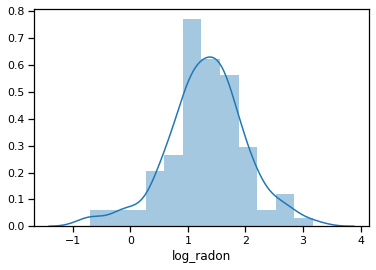

In [3]:
hennepin_radon = radon.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon)

In [7]:
# this confirms that a pdf is a function of *one* variable
hennepin_radon.shape

(105,)

### Pick the model profile

Recall that the first step in Bayesian inference is specifying a **full probability model** for the problem.

This consists of:

- A **likelihood function(s)** for the observations
- **Priors** for all unknown quantities

The measurements look approximately normal (gaussian), so let's start by **assuming a normal distribution as the sampling distribution (likelihood) for the data**.

* This is a very common approach to building a Bayesian model: Get the histogram, see if it looks like Poisson, Normal, Exponential, or a bunch of other analytic pdf's we will or have introduced (like the Beta and Gamma distributions), and try to fit the data to a model of the distribution by varying the distribution's paramter(s).

So we pick a **Normal distribution**, which is described by its two paramaters $\mu$ (mean) and $\sigma$ (standard deviation):

$$y_i \sim N(\mu, \sigma^2)$$

Note that **Normal** and **Gaussian** is the same thing because Gaussian distributions are the most *normal*!

This implies that we have 2 unknowns in the model; the **mean** and **standard deviation** of the distribution. The ones we pick as initial SWAGs (**S**illy **W**ild-**A**ss **G**uesses) are our *priors*. The funky thing about the priors: We will model them as **probability density functions**, too!

***In other words, the parameters of our pdf model are modelled as pdfs themselves!***

<center>
    <img src="images/dog-chase-tail.jpg" width=300 />
</center>

### Choice of priors

How do we choose pdfs for parameters $\mu$ and $\sigma$? 

There are several considerations:

- Discrete vs continuous values
- The support of the variable
- The available prior information

While there may likely be prior information about the distribution of radon values, we will assume ***no prior knowledge*** (about the priors), and specify a **diffuse** prior for each parameter.

Since the mean can take any real value (since it is on the log scale), we will use ***another normal distribution*** here, and specify a *large* variance to allow the possibility of very large or very small values:

$$\mu \sim N(0, 10^2)$$

For the standard deviation, we know that the true value must be positive (no negative variances!). Let's choose a [**uniform**](http://mathworld.wolfram.com/UniformDistribution.html) pdf prior, bounded from below at zero and from above at a value that is sure to be higher than any plausible value the true standard deviation (on the log scale) could take. That way, we are sure to capture the real value, somewhere in -between.

$$\sigma \sim U(0, 10)$$

How did I know to pick these? In one word: *Experience*. It's the same as Machine Learning. There are a lot of points where you have to make good guesses about **hyperparameters**.

We now encode these in a Python model, using the `PyMC3` package.

Introducing PyMC3
-----

PyMC3 is a Python library for programming Bayesian analysis; see [here](https://doi.org/10.7717/peerj-cs.55). It's a pretty wonderful package. Looky [here](https://docs.pymc.io/) for its API and docs. It helps us solve tough inverse problems and extract a model from the data.

We will model the radon problem using PyMC3. This type of programming is called ***probabilistic programming***, and it is probabilistic in that we create probability models using programming variables as the model's components. Model components are first-class primitives within the PyMC3 framework. 

>   Another way of thinking about this: unlike a traditional program, which only runs in the forward directions, a probabilistic program is run in both the forward and backward direction. It runs forward to compute consequences of assumptions it contains about the model, but also backward from the data to constrain possible explanations. In practice, many probabilistic programming systems will cleverly interleave forward and backward operations to efficiently home in on the best explanations.  - [Cronin, Beau. "Why Probabilistic Programming Matters." 24 Mar 2013. Google, Online Posting to Google . Web. 24 Mar. 2013]( https://plus.google.com/u/0/107971134877020469960/posts/KpeRdJKR6Z1)

PyMC3 used to rely on [**theano**](https://en.wikipedia.org/wiki/Theano_(software), a Python library that allows you to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays efficiently, and which we will revisit when we focus on machine learning. Theano is the brainchild of [Yoshua Benjio](https://en.wikipedia.org/wiki/Yoshua_Bengio) of the University of Montreal's [MILA](https://mila.quebec/en/) laboratory. In my opinion, it's the most famous university lab associated to artificial neural networks and deep learning. It's pretty [well-funded](http://nouvelles.umontreal.ca/en/article/2017/09/15/facebook-invests-over-7m-u.s.-in-mila-and-ai-research-in-montreal/).

`theano` is slowly being deprecated because other libraries like facebook's `Torch` and Google's `TensorFlow` now include the same features. Old PyMC3 versions still uses theano, but the newer versions don't, they use [**tensorflow**](https://en.wikipedia.org/wiki/TensorFlow) instead.

For probabilistic programming, you write a program in Python that builds expressions for Theano. You still have to declare variables $a,b,c$ and give their types $(int, int, int)$, build expressions for how to put those variables together $a^b + c$, and compile expression graphs to functions $Pow(a,b,c)$ in order to use them for computation. What theano builds in return is a super-fast callable object from a purely symbolic graph, optimizes the graph, and even compiles some or all of it into native machine instructions. More on Theano [here](http://www.deeplearning.net/software/theano/). 

For older theano versions of PyMC3 (don't do this if you're using a new version of PyMC3):
- On Windows, from the Start menu, search for and open `Anaconda Prompt`. On MacOS, open Launchpad, then click the Terminal icon. On Linux, open a Terminal window. Now in these windows, type `conda install -c mila-udem theano pygpu`. Don't try `!conda install theano` in a jupyter notebook code cell because it may fry your jupyter notebook's kernel. Wait until success. Then in that same terminal, type `conda install pymc3`. Wait until success.

PyMC3 code is easy to read. The only novel thing should be the syntax. Simply remember that we are representing the model's components ($\tau, \lambda_1, \lambda_2$ ) as variables. 

Then execute the following. We name our model and define our priors as the pdf's we mentionned above. Notice priors are most often given greek variable names. The parameters for the priors (the parameters for the parameters of our model, also sometimes called *hyperparameters*) were really just silly guesses, and you have to learn to start with good guesses in data science ;-)

```(python)```
from pymc3 import Model, Uniform

with Model() as radon_model:
    μ = Normal('μ', mu=0, sd=10)
    σ = Uniform('σ', 0, 10)
```

In [8]:
from pymc3 import Normal, Uniform

with Model() as radon_model:
    μ = Normal('μ', mu=0, sd=10)
    σ = Uniform('σ', 0, 10)

> ## Bayesian Software
> There is a good amount of software options for Bayesians, including both open source software (*e.g.*, [Stan](https://en.wikipedia.org/wiki/Stan_(software)), PyMC3, JAGS, emcee) and commercial (*e.g.*, SAS, Stata). Your instructor happens to love `PyMC3`.

All that remains is to add the **likelihood**, which takes $\mu$ and $\sigma$ as parameters, and the log-radon values as the set of observations:
```(python)```
with radon_model:    
    y = Normal('y', mu=μ, sd=σ, observed=hennepin_radon)
```

In [9]:
with radon_model:    
    y = Normal('y', mu=μ, sd=σ, observed=hennepin_radon)

Now, we will fit the model using a numerical approach called [**variational inference**](https://www.cs.jhu.edu/~jason/tutorials/variational.html). This will estimate the posterior distribution using an optimized approximation, and then draw samples from it. This is complicated math. You may read the paper I uploaded on blackboard, but do not worry too much if you don't understand. Computers do all the legwork. We just sit back and watch GoT while they work.

- When you execute the cell below, wait for a pink band to appear. Do not move to another cell before the pink band appears and the computation completes. It may take your laptop a full minute before the pink band appears, and another 30 seconds for the computation to converge.

```(python)```
from pymc3 import fit

with radon_model:

    samples = fit(random_seed=RANDOM_SEED).sample(1000)
    ```

In [10]:
from pymc3 import fit

with radon_model:

    samples = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 136.48: 100%|██████████| 10000/10000 [01:03<00:00, 157.87it/s]
Finished [100%]: Average Loss = 136.37


What we did is fit the best possible analytical gaussian model to the `hennepin_radon` dataset by picking various values of the $\mu$ and $\sigma$ parameters, by varying them across their own probability distributions, which we specified. Actually, PyMC3 did the work, and we watched :-)

Now we're ready to plot our posterior, which is the best possible values for $\mu$ and $\sigma$ that PyMC3 evaluated for us. In other words, the values of $\mu$ and $\sigma$ that result in the best possible $N(\mu, \sigma^2)$.

```(python)```
from pymc3 import plot_posterior

plot_posterior(samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');
```

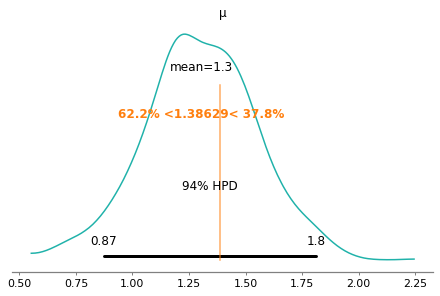

In [12]:
from pymc3 import plot_posterior

plot_posterior(samples, var_names=['μ'], ref_val=np.log(4), color='LightSeaGreen');

The plot shows the posterior distribution of $\mu$, along with an estimate of the 95% posterior **credible interval**. 

The output

    83.1% < 1.38629 < 16.9%%
    
informs us that the probability of $\mu$ being less than $\log(4)$ is 83.1%% and the corresponding probability of being greater than $\log(4)$ is 16.9%.

> **Answer**: The posterior probability that the mean level of household radon in Henneprin County is greater than 4 pCi/L is 0.17.

No questions about the standard deviation, but let's plot it, too:

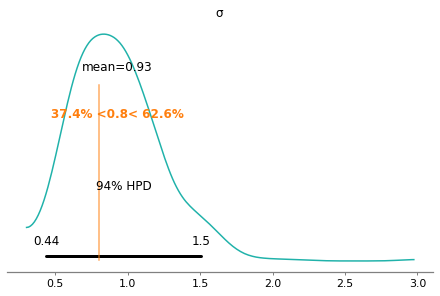

In [13]:
plot_posterior(samples, varnames=['σ'], ref_val=0.8, color='LightSeaGreen');

### Prediction

What is the probability that a given household has a log-radon measurement larger than one? To answer this, we make use of the **posterior predictive distribution**.

$$p(z \;| \; y) = \int_{\theta} p(z \;| \; \theta) p(\theta \; | \; y) d\theta$$

where here $z$ is the predicted value and y is the data used to fit the model.

The posterior predictive distribution accounts for uncertainty about $\theta$. We should refrain from plugging in a single best estimate $\hat{\theta}$ for $\theta$, because it ignores uncertainty about $\theta$, and because a source of uncertainty is ignored, the predicted distribution will be too narrow (extreme values of $\tilde {x}$ will occur more often than the posterior distribution suggests).

The posterior distribution of possible $\theta$ values depends on $\mathbf {X}$: $p(\theta \; | \; \mathbf {X} )$. And the posterior predictive distribution of $\tilde {x}$ given $\mathbf {X}$ is calculated by **marginalizing** the distribution of $\tilde {x}$ given $\theta$ over the posterior distribution of $\theta$ given $ \mathbf {X}$. That is the integral above. See [here](https://en.wikipedia.org/wiki/Posterior_predictive_distribution) for more explanation.

We can estimate the probability that a given household has a log-radon measurement larger than four from the posterior samples of the parameters in the model:
```(python)```
mus = samples['μ']
sigmas = samples['σ']

radon_samples = Normal.dist(mus, sigmas).random()

(radon_samples > np.log(4)).mean()
```

In [14]:
mus = samples['μ']
sigmas = samples['σ']

In [15]:
radon_samples = Normal.dist(mus, sigmas).random()

In [16]:
(radon_samples > np.log(4)).mean()

0.493

<div style="display:none;">
> **Answer**: The posterior probability that a randomly-selected household in Henneprin County contains radon levels in excess of 4 pCi/L is 0.47.
</div>

> **Answer**: The posterior probability that a randomly-selected household in Henneprin County contains radon levels in excess of 4 pCi/L is ...

### Model checking

***How do we know our model is any good?***

It's important to check the fit of the model, to see if the underlying assumptions are reasonable. One way to do this is to perform **posterior predictive checks**. This involves generating simulated data using the model that you built, and comparing that data to the observed data.

One can choose a particular statistic to compare, such as tail probabilities or quartiles, but here it is useful to compare them graphically.

We already have these simulations from our `sns.distplot` example.

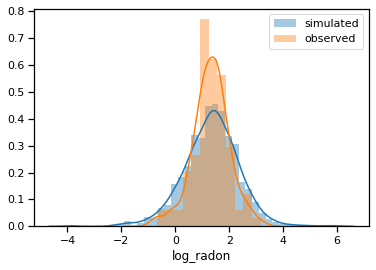

In [17]:
sns.distplot(radon_samples, label='simulated')
sns.distplot(hennepin_radon, label='observed')
plt.legend()

### Prior sensitivity

It is also important to check the sensitivity of your choice of priors to the resulting inference. What if we had guessed ***completely different priors***?

Here's the same model, with drastically different (though still uninformative) priors:

In [18]:
from pymc3 import Flat, HalfCauchy

with Model() as prior_sensitivity:
    
    μ = Flat('μ')
    σ = HalfCauchy('σ', 5)
    
    dist = Normal('dist', mu=μ, sd=σ, observed=hennepin_radon)
    
    sensitivity_samples = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 123.88: 100%|██████████| 10000/10000 [01:00<00:00, 164.41it/s]
Finished [100%]: Average Loss = 123.86


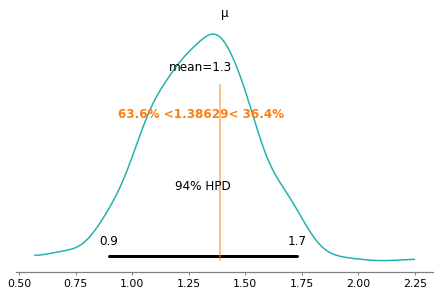

In [19]:
plot_posterior(sensitivity_samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');

Here is the original model for comparison:

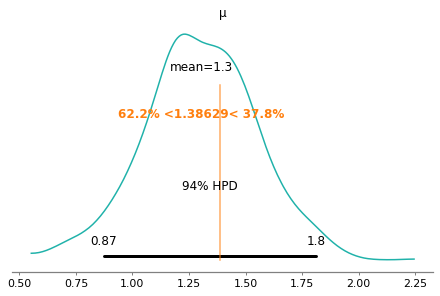

In [20]:
plot_posterior(samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');

*Not much difference* gives us a degree of confidence that our results are good :-)

## Lab #2: Spying on my girlfriend

Ok, let's do some ***real*** data science now. Who care about the great state of Minnesota? I have *more important* problems to think of! Help me ***spy*** on my girlfriend to make sure she does not swap me for a better model of a boyfriend! Actually, ***i'll give you the data***! You just do the data science to tell me she is still faithful to me, ok?

Instead of variational inference, we are going to leverage [Markov Chain Monte Carlo](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) (MCMC)
methods to model data. Running the [Metropolis](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm (one *example* of an MCMC algorithm) may crash your kernel if your laptop is not powerful enough! But it's a good example of probabilistic data science (and *soooo* useful), so let's take a closer look.

If you agree, we'll try to model the rate at which my girlfriend sends and receives text messages, to better
understand underlying dynamics. For example, it is well known that President Trump sends
most of his Twitterstorms early in the morning. What can I infer from my girlfriend's cell phone activity,
without actually looking at its content?

>  You are given a series of daily text-message counts from my girlfriend. The data, plotted over time, appears in the chart below. I am curious to know if my girlfriend's text-messaging habits have changed over time, either gradually or suddenly. How to model this? 

Let's plot some data. First, download `data.zip` from blackboard, unzip `txtdata.csv` and the two other images it contains a new folder called `data` in your Users folder. 

You can leverage linux commands either through `!` or *magic commands* which start with `%`. Use `%pwd` to check your current directory and `%cd /Enter/your/prefered/path/here/` to change it. It should be `Users\<username>`. Then run the following script:

```python
figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did my girlfriend's texting habits change over time?")
plt.xlim(0, n_count_data);
```


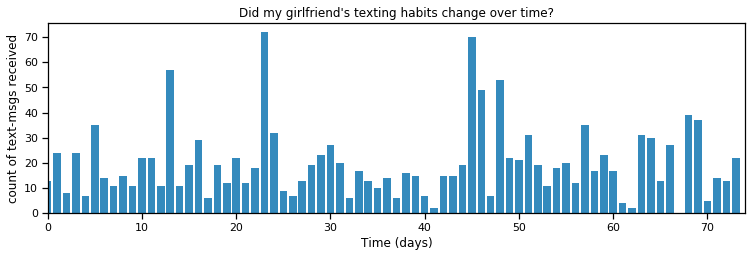

In [22]:
from IPython.core.pylabtools import figsize

figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did my girlfriend's texting habits change over time?")
plt.xlim(0, n_count_data);

Before we start modeling this data (more exactly, the process underlying this data), see what you can figure out just by looking at the chart above. Would you say there was a change in behaviour during this time period? 

<center>
    <img src="images/garfield.jpg" width=150 />
</center>

How can we start to model this? A Poisson random variable is a more appropriate model for this type of *count* data, since count is discrete and count cannot go to infinity and is bounded by the most text messages received in one day. Denoting my girlfriend's day $i$'s text-message count by $C_i$, 

$$ C_i \sim \text{Poisson}(\lambda)  $$

We are not sure what the value of the $\lambda$ parameter really is, however. Looking at the chart above, it appears that the rate might become higher later in the observation period, which is equivalent to saying that $\lambda$ increases at some point during the observations (for discrete processes, expectation is equal to $\lambda$; thus a higher value of $\lambda$ assigns higher probability to larger outcomes. That is, there is a higher probability of many text messages having been sent on a given day).

How can we represent this observation mathematically? Let's build a **model**. 

<center>
    <img src="images/buildmodel.png" width=400 />
</center>

Let's assume that on some day during the observation period (call it $\tau$), the parameter $\lambda$ suddenly jumps to a higher value, because my girlfriend has .. *met someone*.. Yikes! So we really have two $\lambda$ parameters: one for the period before $\tau$, and one for the rest of the observation period. In literature, a sudden transition like this is called a *switchpoint*; values of $\lambda$ before $\tau$ are called *anterior* distributions, and values after, *posterior*.

$$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$

If, in reality, no sudden change occurred and indeed $\lambda_1 = \lambda_2$, then the $\lambda$s posterior distributions should look about equal.

We are interested in inferring the unknown $\lambda$s. To use Bayesian inference, we need to assign prior probabilities to the different possible values of $\lambda$. What would be good prior probability distributions for $\lambda_1$ and $\lambda_2$? Recall that $\lambda$ can be any positive number. As we saw earlier, the *exponential* distribution provides a continuous density function for positive numbers, so it might be a good choice for modeling $\lambda_i$. 

<span style="color:red">Don't get confused.. we are still using the Poisson distribution for modeling the distribution of text messages received, but we will use the exponential distribution for modeling the $\lambda$ of the Poisson distribution. Oh my!</span>

Recall that the exponential distribution takes a parameter of its own, so we'll need to include that parameter in our model. Let's call that parameter $\alpha$. Rememeber, model parameters are always denoted by *greek* letters.

\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}

$\alpha$ is called a *hyper-parameter* or *parent variable*. In literal terms, it is a parameter that influences other parameters. 

Our initial guess at $\alpha$ should not influence the model too strongly, and we should have some flexibility in our choice.  A good hyperparameter rule of thumb is to set the exponential parameter equal to the inverse of the average of the count data. Since we're modeling $\lambda$ using an exponential distribution, we can use the expected value identity shown earlier to get:

$$\frac{1}{N}\sum_{i=0}^N \;C_i \approx E\;[\; \lambda \; |\; \alpha ] = \frac{1}{\alpha}$$ 

A sound (er?) alternative would be to have *two* priors: one for each $\lambda_i$. Creating two exponential distributions with different $\alpha$ values reflects our prior belief that the rate changed at some point during the observations.

What about $\tau$? Because of the noisiness of the data, it's difficult to pick out a priori when $\tau$ might have occurred. Instead, we can assign a *uniform prior belief* to every possible day. This is equivalent to saying

\begin{align}
& \tau \sim \text{DiscreteUniform(1, 70) }\\\\
& \Rightarrow P( \tau = k ) = \frac{1}{70}
\end{align}

We now turn to `PyMC3`. 
```(python)```
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)

    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
```

In [23]:
import pymc3 as pm
import theano.tensor as tt

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)

    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

In the code above, we create the PyMC3 variables corresponding to $\lambda_1$ and $\lambda_2$. We assign them to PyMC3's *stochastic variables*, so-called because they are treated by the back end as random number generators. And we hope we get no errors, because there is serious computation going on here, so please be patient. Then, run the following..
```(python)```
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)
```

In [24]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

This code creates a new function `lambda_`, but really we can think of it as a random variable: the random variable $\lambda$ from above. The `switch()` function assigns `lambda_1` or `lambda_2` as the value of `lambda_`, depending on what side of `tau` we are on. The values of `lambda_` up until `tau` are `lambda_1` and the values afterwards are `lambda_2`.

Note that because `lambda_1`, `lambda_2` and `tau` are random, `lambda_` will be random. We are **not** fixing any variables yet.
```(python)```
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)
```

In [25]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

The variable `observation` combines our data, `count_data`, with our proposed data-generation scheme, given by the variable `lambda_`, through the `observed` keyword. 

The code below is a *learning* step. It's really a machine learning method. The machinery employed is called *Markov Chain Monte Carlo* (MCMC). This technique returns thousands of random variables from the posterior distributions of $\lambda_1, \lambda_2$ and $\tau$. 

The [Metropolis–Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm)
algorithm is a Markov chain Monte Carlo (MCMC) method for obtaining a sequence of random
samples from a probability distribution for which direct sampling is difficult.

The algorithm was named after Nicholas Metropolis, who was an author along with Edward Teller of
the 1953 paper [Equation of State Calculations by Fast Computing Machines](https://bayes.wustl.edu/Manual/EquationOfState.pdf), which first proposed
the algorithm for the case of symmetrical proposal distributions, and W. K. Hastings who extended it
to the more general case in 1970. Nicholas Metropolis had already coined the term "Monte Carlo" in
an earlier paper with Stanislav Ulam, was intimately familiar with the computational aspects of the
method and also lead the group that designed and built the [MANIAC I](https://en.wikipedia.org/wiki/MANIAC_I) computer in 1952, which was used in the experiments. MANIAC 1 could be thought of as the first Data Science computer.

We plot a histogram of the random variables to see what the posterior distributions look like. Below, we collect the samples (called *traces* in the MCMC literature) into histograms. 

Depending on the step size you pick below as parameters to `pm.sample`, this code could potentially crash your Jupyter kernel.

<br />
<center>
<img src="http://currentsurroundings.com/content/random/calvin-hobbes/large/calvin_and_hobbes_067.jpg" width = 150>
</center>

```(python)```


### Metropolis-Hastings simulation

with model:
    step = pm.Metropolis()
    trace = pm.sample(4000, tune=1000, step=step, njobs = 1)
```

In [28]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(4000, tune=1000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]
Sampling 4 chains: 100%|██████████| 20000/20000 [03:40<00:00, 90.71draws/s]
The number of effective samples is smaller than 10% for some parameters.


If you crashed, you should have a yellow `connecting to kernel` or red `stopped` status bar at the top of your notebook. That means you are *hosed* and will not be able to execute any more cells. Oh well.. nice try.. go watch an episode of GoT and come back and.. replace your pm.sample() call with:
```python
trace = pm.sample(3000, tune=800, step=step, njobs = 1)
```
Some other things to try is to reduce 4000 and the `tune` parameter even more.. but then your algorithm might not converge, so find a point at which it works but does nto converge, and keep increasing the parameters untill Metroplois converges. Then carry on..

In [29]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

Now we are ready to plot the posterior distributions of our model parameters:

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


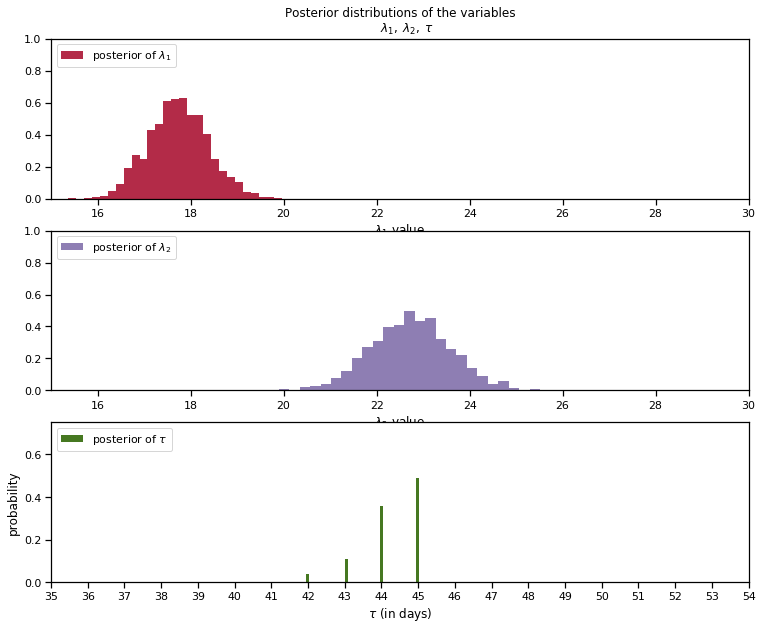

In [30]:
figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

### Interpretation

Recall that Bayesian methodology returns a *distribution*. Hence we now have distributions to describe the unknown $\lambda$s and $\tau$. What have we gained? Immediately, we can see the uncertainty in our estimates: the wider the distribution (the more choice of $\lambda$), the less certain our posterior belief should be. But we can also see what the plausible values for the parameters are: $\lambda_1$ should be around 18 and $\lambda_2$ around 23. The posterior distributions of the two $\lambda$s are clearly distinct, indicating that it is *indeed likely* that there was a change in my girlfriend's text-message behaviour.

Notice also that the posterior distributions for the $\lambda$s do not look like exponential distributions, even though our priors for these variables were exponential. In fact, the posterior distributions are not really of any form that we recognize from the original model. They look like normal distributions! It leads me to believe that I should have picked normal distributions for these priors. But if I do and get the same result, it's ok! This is one of the benefits of taking a computational point of view. If we had instead done this analysis using mathematical approaches, we would have been stuck with an analytically intractable position. Our use of a computational approach makes us indifferent to mathematical tractability.

Our analysis also returned a distribution for $\tau$. Its posterior distribution looks a little different from the other two because it is a *discrete* random variable, so it doesn't assign probabilities to intervals. We can see that near day 45, there is a close to 50% chance that my girlfriend's texting behaviour changed! Had no change occurred, or had the change been gradual over time, the posterior distribution of $\tau$ would have been more spread out, reflecting that many days were plausible candidates for $\tau$. By contrast, in the actual results we see that only three or four days make any sense as potential transition points. 

Nice! (well, not very nice for me..)

### Why do I want to sample the posterior, anyways?

We use posterior sampling to answer the following question: what is the expected number of texts at day $t, \; 0 \le t \le 70$ ? Recall that the expected value of a Poisson variable is equal to its parameter $\lambda$. Therefore, the question is equivalent to *what is the expected value of $\lambda$ at time $t$*?

In the code below, let $i$ index samples from the posterior distributions. Given a day $t$, we average over all possible $\lambda_i$ for that day $t$, using $\lambda_i = \lambda_{1,i}$ if $t \lt \tau_i$ (that is, if the behaviour change has not yet occurred), else we use $\lambda_i = \lambda_{2,i}$.

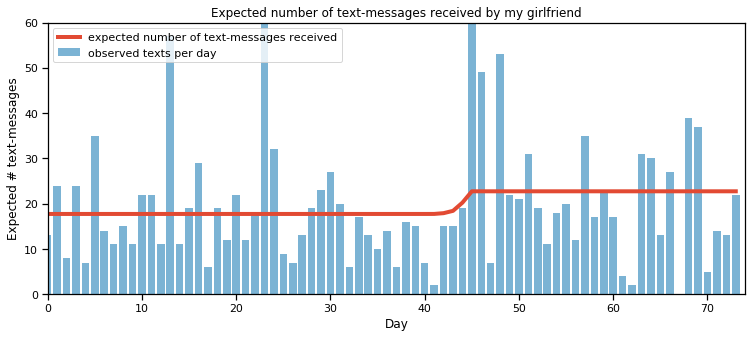

In [31]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received by my girlfriend")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

Your analysis shows strong support for believing my girlfriend's behavior did change ($\lambda_1$ would have been close in value to $\lambda_2$ had this not been true), and that the change was sudden rather than gradual (as demonstrated by $\tau$'s strongly peaked posterior distribution). We can only speculate what might have caused this: Perhaps a new relationship?! If i weren't a data scientist, I might have been fooled!

It's interesting that you don't really have to scan for content to figure out dynamics involving content. You can just use probability and statistics and start counting to unearth events. This is how US government is running its domestic (and probably foreign, too) surveillance program. It does not need to spy on your cell phone conversations, but it most certainly catalogues the amount of texts and phone calls and can probably trace their origin and in some cases connect you to potentially shady characters, and *then start surveilling your messages and conversations*...

And as far as i'm concerned..

<center>
    <img src="images/cry.png" width=200 />
</center>

## Conclusion

The most difficult part of Bayesian estimation is the part that models the paramters of the pdf you picked as your model as pdfs themselves. You might think that it's picking the right statistical profile that matches the histogram of the dataset, but that's usually not that hard. Picking the shape of the pdf for each model parameter is harder because you don't have a physical profile to match! And then, you also need to pick initial conditions for these parameters. It's all about experience! If you ***make the right choices*** (and that is often the *art* behind Bayesian inference), then Bayesian packages like `PyMc3` will do all the work for you, and you will get a good **model** of your dataset, and then you can throw away all the historical data and use that model to do predictions.

Machine Learning is similar to Bayesian estimation in that you need to guess a lot of hyperparameters for the machine model (this is why yours truly loves Random forests because there are so few associated hyperparameters). Most ML algorithms however won't yield estimations of the guessing error, which Bayesian estimation methods ***do*** yield. And that becomes very important when a machine tells you to do something ***scary***. *Ummm... are you sure you want me to accelerate to 120 mph? What's the statistical error in your prediction?* 

You want to be able to ask these questions from machines! And that is why **Bayesian Machine Learning** is the state of the art in ML.

## References and Resources

- Goodman, S. N. (1999). Toward evidence-based medical statistics. 1: The P value fallacy. Annals of Internal Medicine, 130(12), 995–1004. http://doi.org/10.7326/0003-4819-130-12-199906150-00008
- Johnson, D. (1999). The insignificance of statistical significance testing. Journal of Wildlife Management, 63(3), 763–772.
- Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). Bayesian Data Analysis, Third Edition. CRC Press.
-  Norvig, Peter. 2009. [The Unreasonable Effectiveness of Data](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/35179.pdf).
- Salvatier, J, Wiecki TV, and Fonnesbeck C. (2016) Probabilistic programming in Python using PyMC3. *PeerJ Computer Science* 2:e55 <https://doi.org/10.7717/peerj-cs.55>
- Cronin, Beau. "Why Probabilistic Programming Matters." 24 Mar 2013. Google, Online Posting to Google . Web. 24 Mar. 2013. <https://plus.google.com/u/0/107971134877020469960/posts/KpeRdJKR6Z1>.